# Vandermonte Interpolation

In [34]:
import numpy as np
import pandas as pd
from pylab import mpl
import matplotlib.pyplot as plt

In [2]:
def create_vandermonte_matrix(x, y):
    van_mat = np.array([x*x*x, x*x, x, x**0], float)

In [6]:
arr = np.array([-2, -1, 2, 3])
vander = np.vander(arr)
vander

array([[-8,  4, -2,  1],
       [-1,  1, -1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1]])

In [8]:
b = [12.13533528, 6.367879441, -4.610943910, 2.085536923]
b

[12.13533528, 6.367879441, -4.61094391, 2.085536923]

In [9]:
np.linalg.solve(vander, b)

array([ 4.12412028e-01,  9.39374042e-01, -5.83621791e+00,  4.69951740e-03])

In [10]:
def polinomial(x):
    0.4124*(x*x*X) + 0.9394*(x*x) - 5.8362*(x) + 0.0047

# Polinomio Interpolante de Newton

In [27]:
float_formatter = "{:.12f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [28]:
def get_diff_table(X,Y):
    """
         Get the market insert
    """
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A

In [29]:
X = np.array([1, 1.2, 1.4, 1.6, 1.8, 2])
Y = np.array([0.6747, 0.8491, 1.1214, 1.4921, 1.9607, 2.5258])
A = get_diff_table(X,Y)
df = pd.DataFrame(A)
df

,0,1,2,3,4,5
0,0.6747,0.0000,0.00000,0.000000,0.000000,0.000000
1,0.8491,0.8720,0.00000,0.000000,0.000000,0.000000
2,1.1214,1.3615,1.22375,0.000000,0.000000,0.000000
3,1.4921,1.8535,1.23000,0.010417,0.000000,0.000000
4,1.9607,2.3430,1.22375,-0.010417,-0.026042,0.000000
5,2.5258,2.8255,1.20625,-0.029167,-0.023438,0.002604


In [31]:
def newton_interpolation(X,Y,x):
    """
         Calculate the interpolation of x points
    """
    sum=Y[0]
    temp=np.zeros((len(X),len(X)))
         # 
    for i in range(0,len(X)):
        temp[i,0]=Y[i]
    temp_sum=1.0
    for i in range(1,len(X)):
                 #x polynomial
        temp_sum=temp_sum*(x-X[i-1])
                 # 
        for j in range(i,len(X)):
            temp[j,i]=(temp[j,i-1]-temp[j-1,i-1])/(X[j]-X[j-i])
        sum+=temp_sum*temp[i,i] 
    return sum

In [59]:
xs=np.linspace(np.min(X),np.max(X),1000,endpoint=True)
ys=[]
for x in xs:
    ys.append(newton_interpolation(X,Y,x))


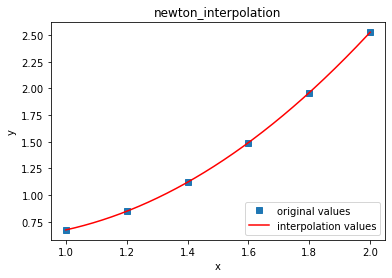

In [36]:
plt.title("newton_interpolation")
plt.plot(X,Y,'s',label="original values")#blue dot indicates the original value
plt.plot(xs,ys,'r',label='interpolation values')#Interpolation curve
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc=4)# spe

In [79]:
x = np.array([0, 2, 3, 4, 5, 6, 7])
y = np.array([1.1247, -0.8540, 0.5864, 7, -0.9062, 0.9081, -0.27])
vander_syst = np.vander(x)
aug = np.c_[vander_syst, y]
van = pd.DataFrame(aug)
van

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.1247
1,64.0,32.0,16.0,8.0,4.0,2.0,1.0,-0.8540
2,729.0,243.0,81.0,27.0,9.0,3.0,1.0,0.5864
3,4096.0,1024.0,256.0,64.0,16.0,4.0,1.0,7.0000
4,15625.0,3125.0,625.0,125.0,25.0,5.0,1.0,-0.9062
5,46656.0,7776.0,1296.0,216.0,36.0,6.0,1.0,0.9081
6,117649.0,16807.0,2401.0,343.0,49.0,7.0,1.0,-0.2700


In [80]:
np.linalg.solve(vander_syst, y)

array([-0.155638412698, 3.534849642857, -30.760027579363,
       127.199636309514, -247.673262579346, 180.061685476176,
       1.124700000000])

In [81]:
def pivot_gauss(n, augmented_matrix):
    # Applying Gauss Elimination
    x = np.zeros(n)
    swapping_list = []
    
    for i in range(n):
        
        largest = 0
        row_of_largest = 0
        column_of_largest = 0
        for j in range (i, n):
            for k in range (n):
                if abs(largest) < abs(augmented_matrix[j][k]):
                    largest = augmented_matrix[j][k]
                    row_of_largest = j
                    column_of_largest = k
                    #print (f'largest = {largest}, column = {column_of_largest}, row = {row_of_largest}')
                    
        if(row_of_largest != i or column_of_largest != i):
            augmented_matrix[[row_of_largest, i]] = augmented_matrix[[i, row_of_largest]]
            swap = [column_of_largest, i]
            swapping_list.append(swap)
            augmented_matrix[:,[i, int(column_of_largest)]] = augmented_matrix[:,[int(column_of_largest),i]]
        
        for j in range(i,n): 
            if abs(augmented_matrix[j][i]) > abs(augmented_matrix[i][i]):  
                augmented_matrix[[i,j]] = augmented_matrix[[j,i]]
            else: 
                pass  
        print(f'Pivot Etapa {i} \n{pd.DataFrame(augmented_matrix)}')
            
        if augmented_matrix[i][i] == 0.0:
            return None #Results in division by 0

        for j in range(i+1, n):
            ratio = augmented_matrix[j][i]/augmented_matrix[i][i]
            
            #print(augmented_matrix)
            
            for k in range(n+1):
                augmented_matrix[j][k] = augmented_matrix[j][k] - ratio * augmented_matrix[i][k]
                
        print(f'Operate Etapa {i} \n{pd.DataFrame(augmented_matrix)}')   
                
    # Back Substitution
    x[n-1] = augmented_matrix[n-1][n]/augmented_matrix[n-1][n-1]

    for i in range(n-2,-1,-1):
        x[i] = augmented_matrix[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - augmented_matrix[i][j]*x[j]

        x[i] = x[i]/augmented_matrix[i][i]
    
    for i in reversed(range (len(swapping_list))):
        x[swapping_list[i][0]], x[swapping_list[i][1]] = x[swapping_list[i][1]], x[swapping_list[i][0]]
        print(x)
        
    # Displaying solution
    print('\nRequired solution is: ')
    for i in range(n):
        print('X%d = %f' %(i,x[i]), end = '\t')

In [82]:
pivot_gauss(7, aug)

Pivot Etapa 0 
          0        1       2      3     4    5    6       7
0  117649.0  16807.0  2401.0  343.0  49.0  7.0  1.0 -0.2700
1      64.0     32.0    16.0    8.0   4.0  2.0  1.0 -0.8540
2     729.0    243.0    81.0   27.0   9.0  3.0  1.0  0.5864
3    4096.0   1024.0   256.0   64.0  16.0  4.0  1.0  7.0000
4   15625.0   3125.0   625.0  125.0  25.0  5.0  1.0 -0.9062
5   46656.0   7776.0  1296.0  216.0  36.0  6.0  1.0  0.9081
6       0.0      0.0     0.0    0.0   0.0  0.0  1.0  1.1247
Operate Etapa 0 
          0             1            2           3          4         5  \
0  117649.0  16807.000000  2401.000000  343.000000  49.000000  7.000000   
1       0.0     22.857143    14.693878    7.813411   3.973344  1.996192   
2       0.0    138.857143    66.122449   24.874636   8.696377  2.956625   
3       0.0    438.857143   172.408163   52.058309  14.294044  3.756292   
4       0.0    892.857143   306.122449   79.446064  18.492295  4.070328   
5       0.0   1110.857143   343.836735

In [83]:
x = np.array([0, 2, 3, 4, 5, 6, 7])
y = np.array([1.1247, -0.8540, 0.5864, 7, -0.9062, 0.9081, -0.27])
A = get_diff_table(x,y)
df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6
0,1.1247,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.8540,-0.98935,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5864,1.44040,0.809917,0.000000,0.000000,0.000000,0.000000
3,7.0000,6.41360,2.486600,0.419171,0.000000,0.000000,0.000000
4,-0.9062,-7.90620,-7.159900,-3.215500,-0.726934,0.000000,0.000000
5,0.9081,1.81430,4.860250,4.006717,1.805554,0.422081,0.000000
6,-0.2700,-1.17810,-1.496200,-2.118817,-1.531383,-0.667388,-0.155638


In [71]:
xs=np.linspace(np.min(X),np.max(X),1000,endpoint=True)
ys=[]
for x in xs:
    ys.append(newton_interpolation(X,Y,x))

In [ ]:
return 